
## Explanation of the variables of the dataset
1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI : Body Mass Index (BMI).
3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke : (Ever told) (you had) a stroke?
6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
9. Sex : Are you male or female?
10. AgeCategory: Fourteen-level age category
11. Race : Ethnicity
12. Diabetic : (Ever told) (you had) diabetes?
13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth : Would you say that in general your health is...
15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma : (Ever told) (you had) asthma?
17. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer : (Ever told) (you had) skin cancer?




 






<h1>Importing Libraries</h1>

In [182]:
#All Imports

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [183]:
#To display diagrams of Transformers in the Pipeline
from sklearn import set_config
set_config(display='diagram')

In [184]:
df = pd.read_csv('/Users/avinashjha/Downloads/VSC/DataSet/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [185]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [186]:
#Check Null Values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [187]:
#Delete Duplicates
df.drop_duplicates(inplace=True)


In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00
SleepTime,301717.0,7.084559,1.467122,1.00,6.00,7.00,8.00,24.00


In [189]:
#Print all Unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print("Unique Values:", unique_values)
    print()

Column: HeartDisease
Unique Values: ['No' 'Yes']

Column: BMI
Unique Values: [16.6  20.34 26.58 ... 62.42 51.46 46.56]

Column: Smoking
Unique Values: ['Yes' 'No']

Column: AlcoholDrinking
Unique Values: ['No' 'Yes']

Column: Stroke
Unique Values: ['No' 'Yes']

Column: PhysicalHealth
Unique Values: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]

Column: MentalHealth
Unique Values: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]

Column: DiffWalking
Unique Values: ['No' 'Yes']

Column: Sex
Unique Values: ['Female' 'Male']

Column: AgeCategory
Unique Values: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

Column: Race
Unique Values: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Column: Diabetic
Unique Values: ['Yes' 'No' 'No, borderl

In [190]:
label_cols=["Smoking",
        "AlcoholDrinking",
        "Stroke",
        "DiffWalking",
        "Sex",
        "Diabetic",
        "PhysicalActivity",
        "Asthma",
        "KidneyDisease",
        "SkinCancer" ]

ohe_cols=["Race"]

ordinal_cols=["GenHealth"]

numerical_cols=["BMI",
                "PhysicalHealth",
                "MentalHealth",
                "SleepTime",
                "AgeCategory"]


Refining Data


In [191]:
#DIABETIC#
df["Diabetic"] =  df["Diabetic"].replace({'No, borderline diabetes':"No",
                              'Yes (during pregnancy)':"Yes" })

In [192]:
df_copy=pd.DataFrame({})

In [193]:
#Target
df_copy["HeartDisease"] = df["HeartDisease"].map({'No': 0, 'Yes': 1})

def changeAgeCategory(rows):
        try:
           mean_age = np.mean([int(num) for num in rows['AgeCategory'].split("-")])
           return mean_age
        except:
           if rows['AgeCategory'].lower()=="80 or older":
               mean_age=80
               return mean_age

df_copy["AgeCategory"]=df.apply(changeAgeCategory,axis=1)
df_copy[numerical_cols[:-1]]=df[numerical_cols[:-1]]
df_copy[ohe_cols]=df[ohe_cols]
df_copy[ordinal_cols]=df[ordinal_cols]

label_encoder = LabelEncoder()
for cols in label_cols:
    df_copy[cols] = label_encoder.fit_transform(df[cols])
    
df_copy    


,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Race,GenHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,57.0,16.60,3.0,30.0,5.0,White,Very good,1,0,0,0,0,1,1,1,0,1
1,0,80.0,20.34,0.0,0.0,7.0,White,Very good,0,0,1,0,0,0,1,0,0,0
2,0,67.0,26.58,20.0,30.0,8.0,White,Fair,1,0,0,0,1,1,1,1,0,0
3,0,77.0,24.21,0.0,0.0,6.0,White,Good,0,0,0,0,0,0,0,0,0,1
4,0,42.0,23.71,28.0,0.0,8.0,White,Very good,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,62.0,27.41,7.0,0.0,6.0,Hispanic,Fair,1,0,0,1,1,1,0,1,0,0
319791,0,37.0,29.84,0.0,0.0,5.0,Hispanic,Very good,1,0,0,0,1,0,1,1,0,0
319792,0,47.0,24.24,0.0,0.0,6.0,Hispanic,Good,0,0,0,0,0,0,1,0,0,0
319793,0,27.0,32.81,0.0,0.0,12.0,Hispanic,Good,0,0,0,0,0,0,0,0,0,0


<h1>Visualizations</h1>


<Axes: >

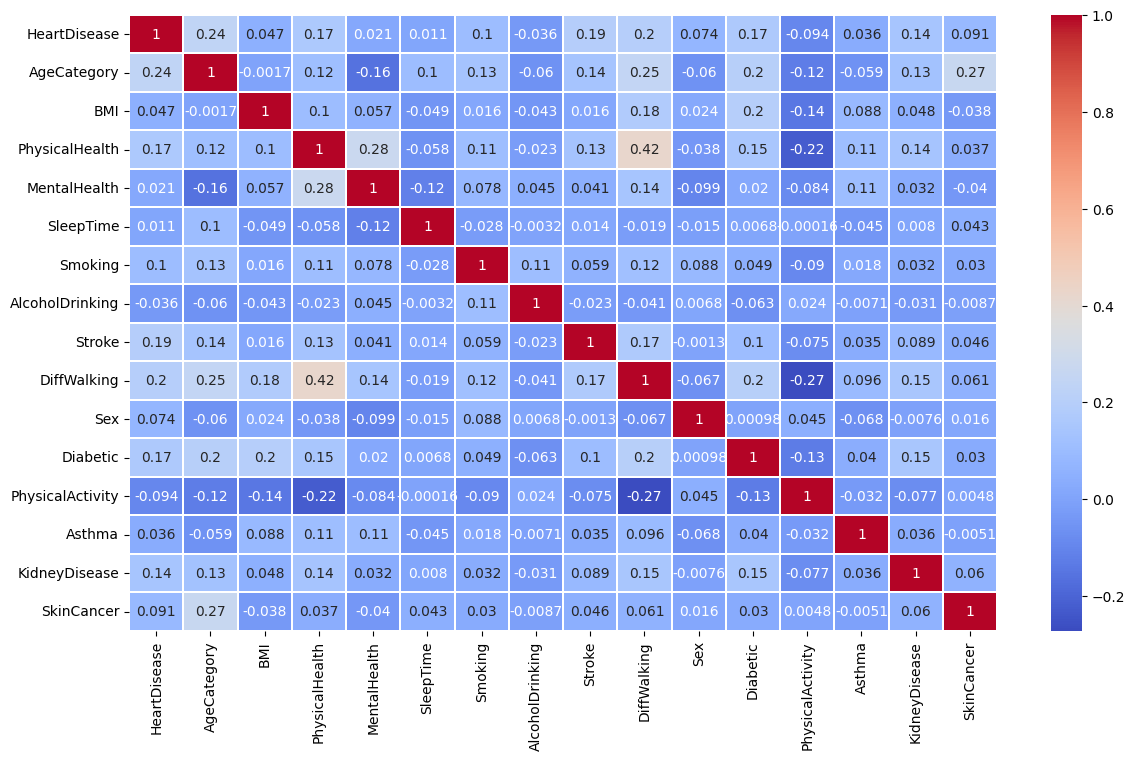

In [194]:
#HeatMap
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(df_copy.select_dtypes(exclude="object").corr(),cmap="coolwarm",linewidth=0.2,annot=True)

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

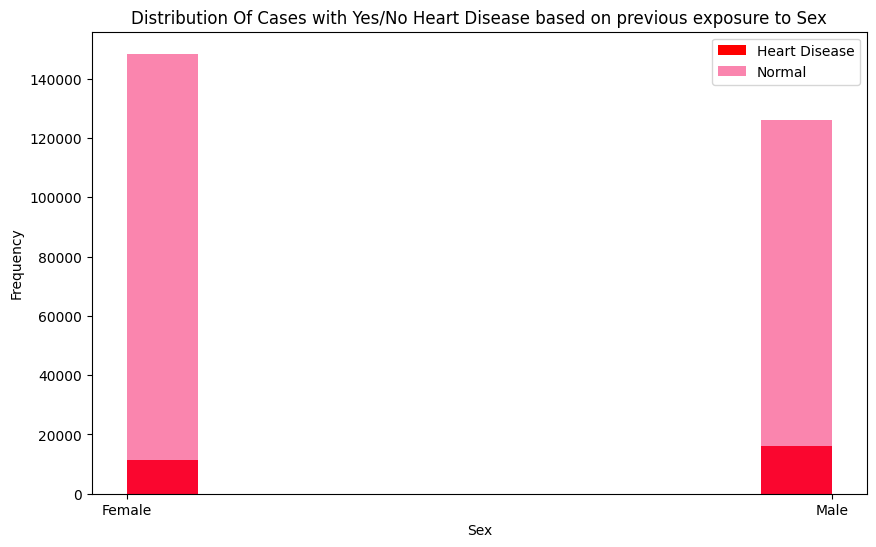

In [195]:
ax=df_copy[df_copy["HeartDisease"]==1]["Sex"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to Sex",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["Sex"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)
ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.set_xticks([0,1])
ax.set_xticklabels(["Female","Male"])


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

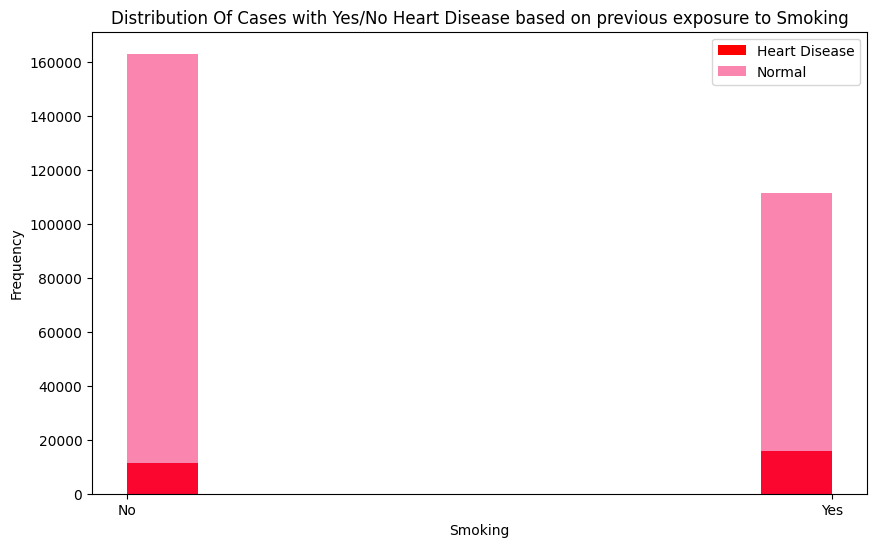

In [196]:
ax=df_copy[df_copy["HeartDisease"]==1]["Smoking"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to Smoking",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["Smoking"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)
ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])

Text(0, 0.5, 'Frequency')

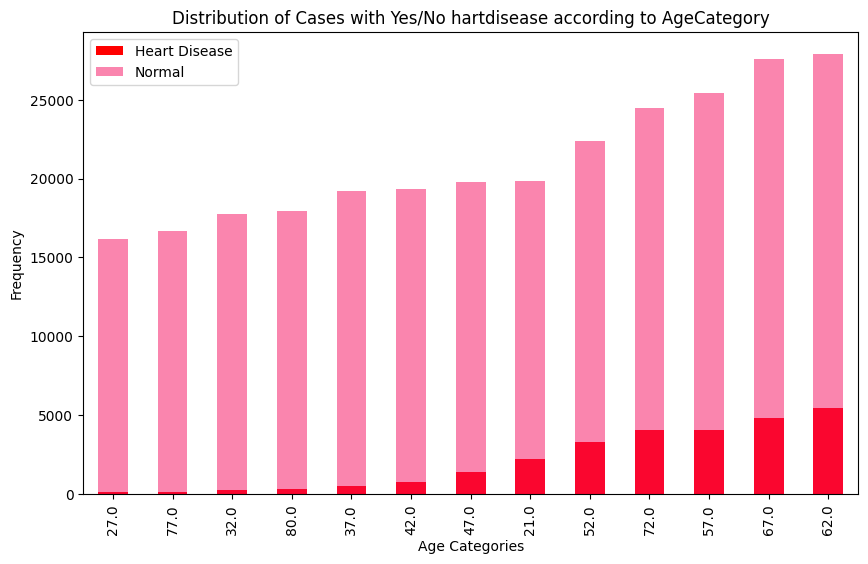

In [197]:
ax=df_copy[df_copy["HeartDisease"]==1]["AgeCategory"].value_counts().sort_values(ascending=True).plot(kind="bar",
                                                                          title="Distribution of Cases with Yes/No hartdisease according to AgeCategory",
                                                                          color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["AgeCategory"].value_counts().sort_values(ascending=True).plot(kind="bar",color="#F60D5F",alpha=0.5)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Age Categories")
ax.set_ylabel("Frequency")




[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

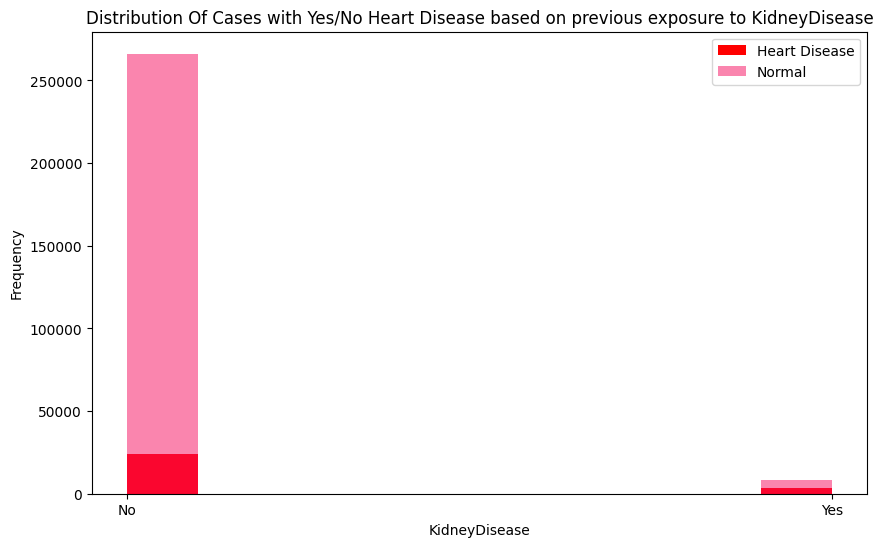

In [198]:
ax=df_copy[df_copy["HeartDisease"]==1]["KidneyDisease"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to KidneyDisease",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["KidneyDisease"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

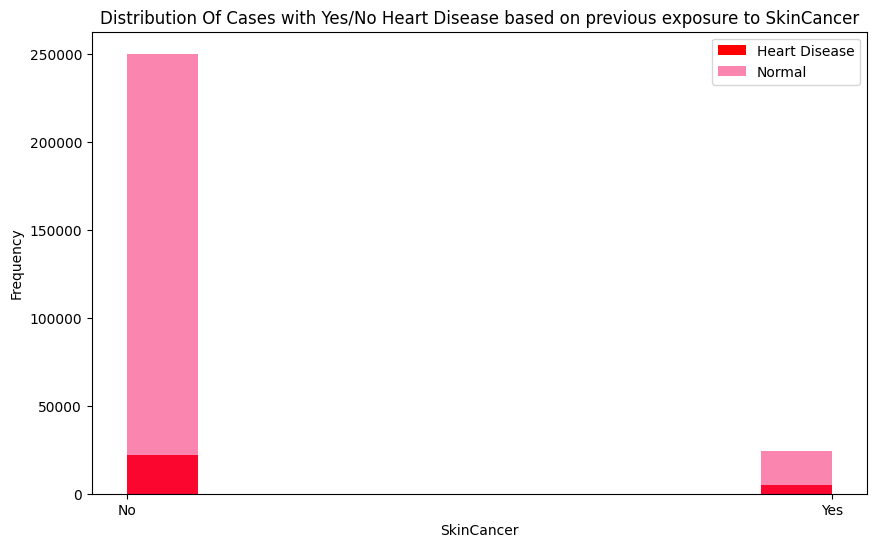

In [199]:
ax=df_copy[df_copy["HeartDisease"]==1]["SkinCancer"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to SkinCancer",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["SkinCancer"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

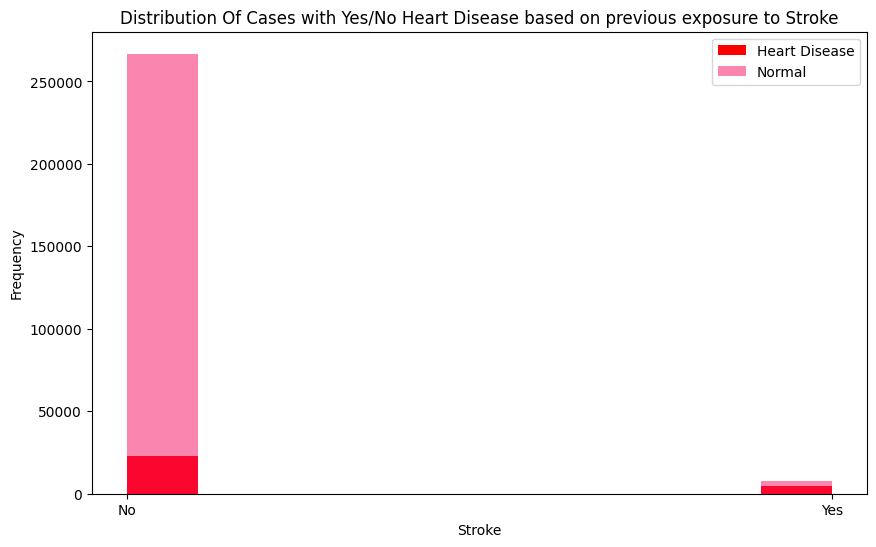

In [200]:
ax=df_copy[df_copy["HeartDisease"]==1]["Stroke"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to Stroke",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["Stroke"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

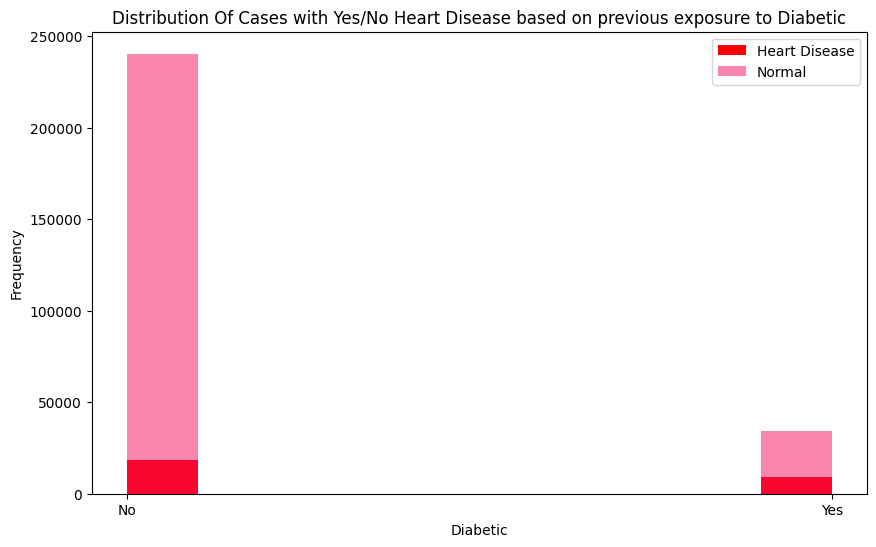

In [201]:
ax=df_copy[df_copy["HeartDisease"]==1]["Diabetic"].plot(kind="hist",
                                                        title="Distribution Of Cases with Yes/No Heart Disease based on previous exposure to Diabetic",
                                                        color="Red",alpha=1,figsize=(10,6))

ax=df_copy[df_copy["HeartDisease"]==0]["Diabetic"].plot(kind="hist",color="#F60D5F",alpha=0.5,ax=ax)

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])


Text(0, 0.5, 'Density')

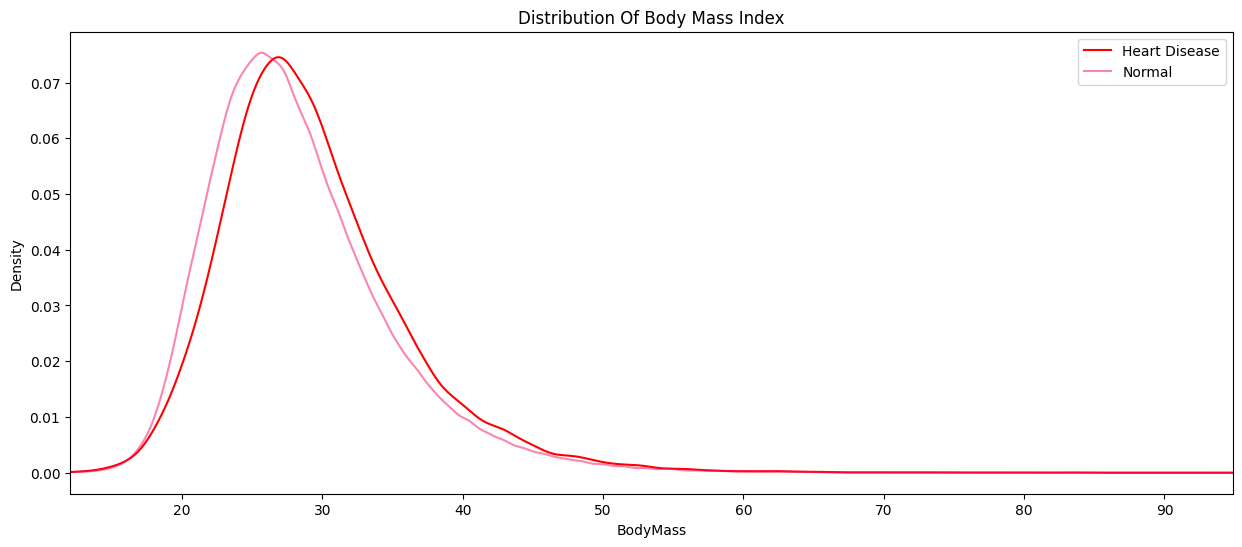

In [202]:
max_x=df_copy["BMI"].max()
min_x=df_copy["BMI"].min()

ax=df_copy[df_copy["HeartDisease"]==1]["BMI"].plot(kind="density",title="Distribution Of Body Mass Index",color="Red",alpha=1,figsize=(15,6),xlim=(min_x,max_x))
ax=df_copy[df_copy["HeartDisease"]==0]["BMI"].plot(kind="density",color="#F60D5F",alpha=0.5,xlim=(min_x,max_x))
ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("BodyMass")
ax.set_ylabel("Density")


Text(0, 0.5, 'Density')

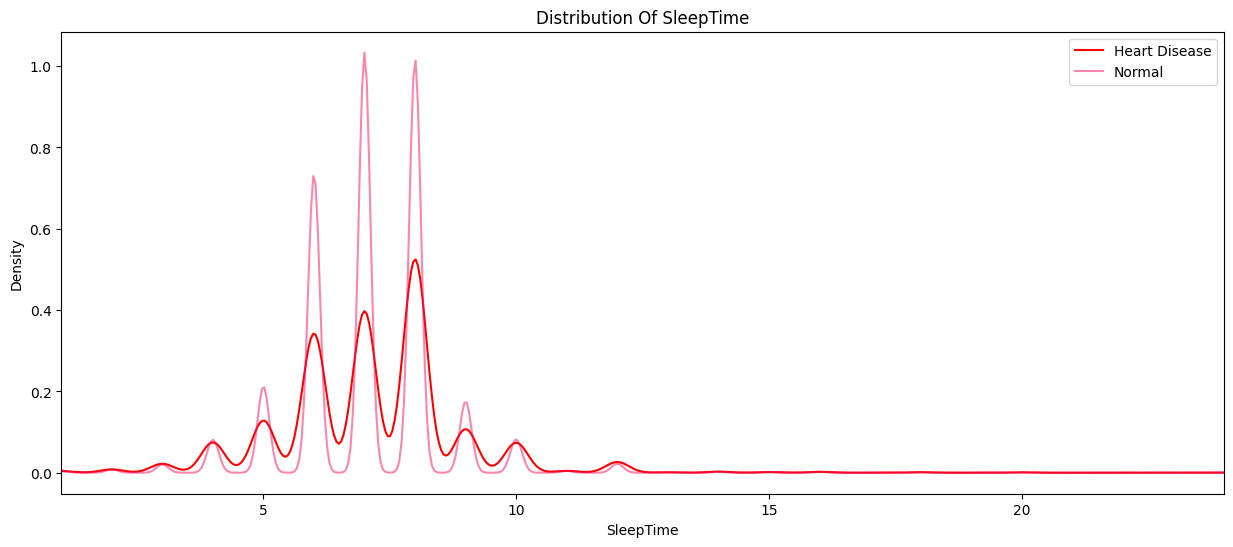

In [203]:
max_x=df_copy["SleepTime"].max()
min_x=df_copy["SleepTime"].min()

ax=df_copy[df_copy["HeartDisease"]==1]["SleepTime"].plot(kind="density",title="Distribution Of SleepTime",color="Red",alpha=1,figsize=(15,6),xlim=(min_x,max_x))
ax=df_copy[df_copy["HeartDisease"]==0]["SleepTime"].plot(kind="density",color="#F60D5F",alpha=0.5,xlim=(min_x,max_x))
ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("SleepTime")
ax.set_ylabel("Density")

Text(0, 0.5, 'Density')

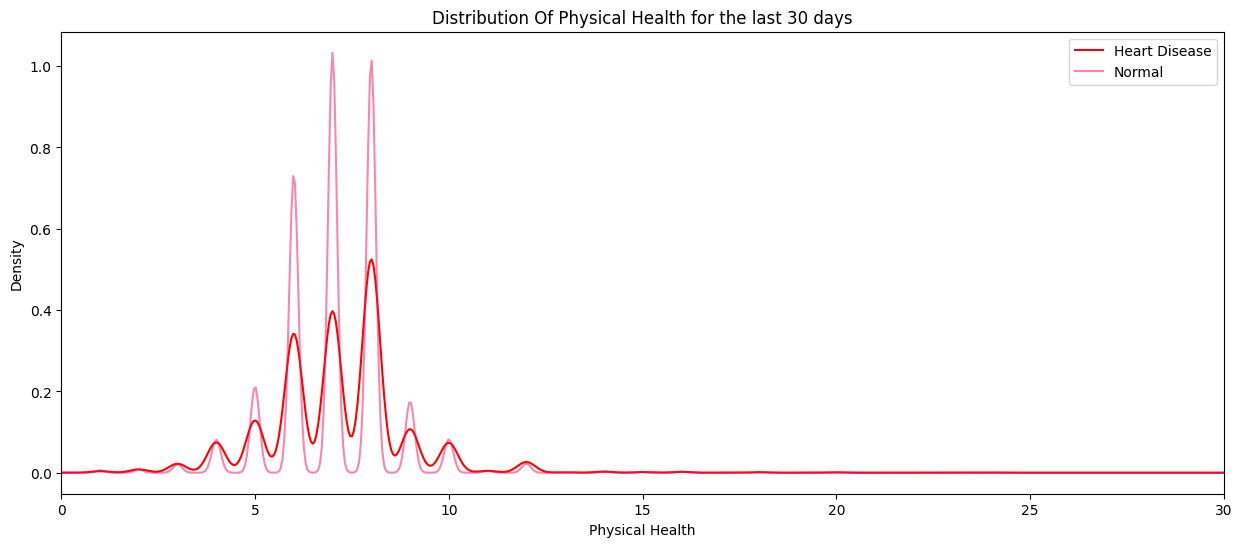

In [204]:
max_x=df_copy["PhysicalHealth"].max()
min_x=df_copy["PhysicalHealth"].min()

ax=df_copy[df_copy["HeartDisease"]==1]["SleepTime"].plot(kind="density",
                                                         title="Distribution Of Physical Health for the last 30 days",
                                                         color="Red",alpha=1,figsize=(15,6),xlim=(min_x,max_x))

ax=df_copy[df_copy["HeartDisease"]==0]["SleepTime"].plot(kind="density",color="#F60D5F",alpha=0.5,xlim=(min_x,max_x))

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Physical Health")
ax.set_ylabel("Density")

In [205]:
max_x=df_copy["MentalHealth"].max()
min_x=df_copy["MentalHealth"].min()

ax=df_copy[df_copy["HeartDisease"]==1]["SleepTime"].plot(kind="density",
                                                         title="Distribution of Mental Health state for the last 30 days",
                                                         color="Red",alpha=1,figsize=(15,6),xlim=(min_x,max_x))

ax=df_copy[df_copy["HeartDisease"]==0]["SleepTime"].plot(kind="density",color="#F60D5F",alpha=0.5,xlim=(min_x,max_x))

ax.legend(['Heart Disease', 'Normal'])
ax.set_xlabel("Mental Health")
ax.set_ylabel("Density")

<h1>Train Test Split
</h1>

In [ ]:
#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(df_copy.iloc[:,1:],df_copy.iloc[:,0],test_size=0.2,random_state=1)


In [ ]:
print(x_test.shape,x_train.shape)

(60344, 17) (241373, 17)


In [ ]:
#Encoding
preprocessor=ColumnTransformer([
    ("ohe_feature",OneHotEncoder(sparse=False,drop="first"),ohe_cols),
    ("ord",OrdinalEncoder(),ordinal_cols),
    ("scale",StandardScaler(),numerical_cols)
],remainder="passthrough")

#All Models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree',DecisionTreeClassifier()),
    ('KNN',KNeighborsClassifier(n_neighbors=18))
]




In [ ]:
#To store each of the model's metrics
model_metrics = {}


In [ ]:
# Train multiple models using the same pipeline
for model_name, model in models:
          
          pipeline = Pipeline([
          ('preprocessor', preprocessor),
          ('model', model)
          ])
          pipeline.fit(x_train, y_train)
          
          y_pred = pipeline.predict(x_test)
          y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
          
          metrics = {
                     'Accuracy': accuracy_score(y_test, y_pred),
                     'Precision': precision_score(y_test, y_pred),
                     'Recall': recall_score(y_test, y_pred),
                     'F1 Score': f1_score(y_test, y_pred),
                     'Cohen\'s Kappa Score': cohen_kappa_score(y_test, y_pred),
                     'AUC': roc_auc_score(y_test, y_pred_proba),
                     'Confusion Matrix': confusion_matrix(y_test, y_pred),
                     'fpr':roc_curve(y_test, y_pred_proba)[0],
                     'tpr' :roc_curve(y_test, y_pred_proba)[1]
                    }
    
          model_metrics[model_name] = metrics

          for model_name, metrics in model_metrics.items():
              print(f'{model_name} Metrics:')
              print()
              for metric_name, value in metrics.items():
                  print(f'{metric_name}: {value}')
                  print('------------------------------------------------')
              print()
              print()

Logistic Regression Metrics:

Accuracy: 0.909253612620973
------------------------------------------------
Precision: 0.49427679500520294
------------------------------------------------
Recall: 0.08691674290942361
------------------------------------------------
F1 Score: 0.1478369125427949
------------------------------------------------
Cohen's Kappa Score: 0.12411128745609723
------------------------------------------------
AUC: 0.8193923729435066
------------------------------------------------
Confusion Matrix: [[54393   486]
 [ 4990   475]]
------------------------------------------------
fpr: [0.         0.         0.         ... 0.99686583 0.99686583 1.        ]
------------------------------------------------
tpr: [0.00000000e+00 1.82982617e-04 1.28087832e-03 ... 9.99817017e-01
 1.00000000e+00 1.00000000e+00]
------------------------------------------------




KeyboardInterrupt: 

In [ ]:
#Display First Model's Metrics
next(iter(model_metrics.items()))


('Logistic Regression',
 {'Accuracy': 0.909253612620973,
  'Precision': 0.49427679500520294,
  'Recall': 0.08691674290942361,
  'F1 Score': 0.1478369125427949,
  "Cohen's Kappa Score": 0.12411128745609723,
  'AUC': 0.8193923729435066,
  'Confusion Matrix': array([[54393,   486],
         [ 4990,   475]]),
  'fpr': array([0.        , 0.        , 0.        , ..., 0.99686583, 0.99686583,
         1.        ]),
  'tpr': array([0.00000000e+00, 1.82982617e-04, 1.28087832e-03, ...,
         9.99817017e-01, 1.00000000e+00, 1.00000000e+00])})

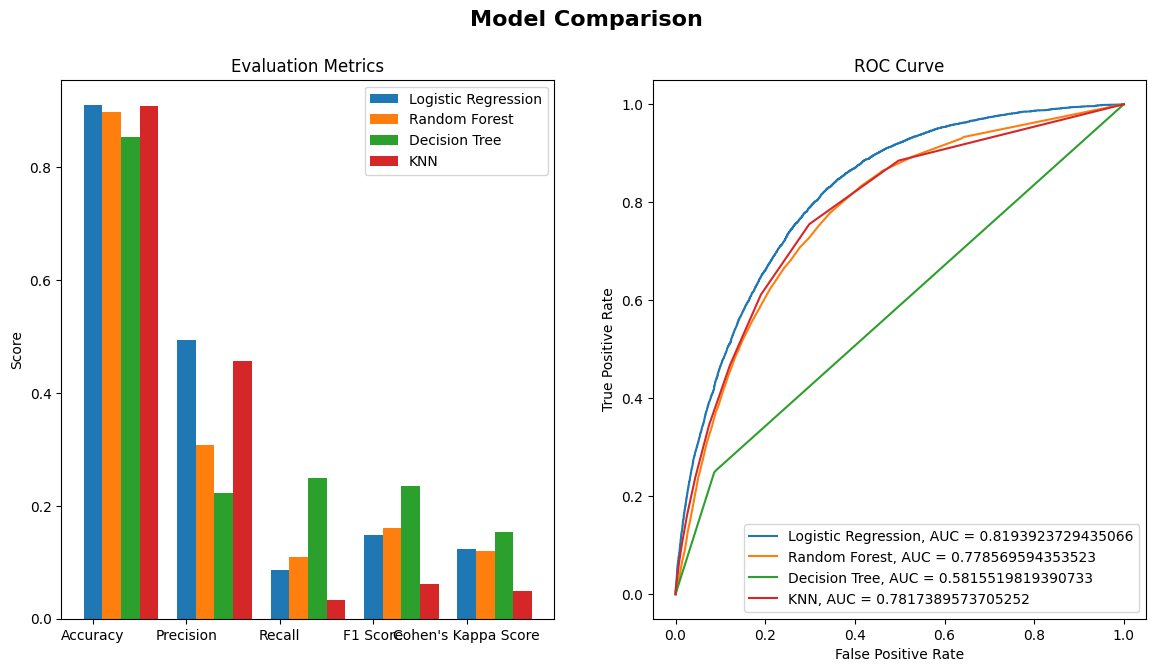

In [ ]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Evaluation Metrics plot
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen\'s Kappa Score']
x = np.arange(len(labels))
width = 0.2

for i, (model_name, metrics) in enumerate(model_metrics.items()):
    
    scores = [
              metrics['Accuracy'],
              metrics['Precision'],
              metrics['Recall'], 
              metrics['F1 Score'], 
              metrics['Cohen\'s Kappa Score']
              ]
    
    ax1.bar(x + i*width, scores, width, label=model_name)

ax1.set_ylabel('Score')
ax1.set_title('Evaluation Metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

# ROC Curve plot
for model_name, metrics in model_metrics.items():

    ax2.plot(
        metrics["fpr"], 
        metrics["tpr"], 
        label=f'{model_name}, AUC = {metrics["AUC"]}'
        )

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()

plt.show()

<h1>KNN : Best Value of K
</h1>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

KeyboardInterrupt: 

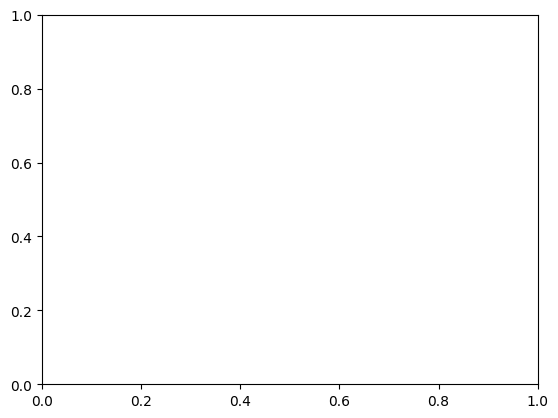

In [ ]:
#To Check which Value of K in KNN model is the most efficient

k_vals=np.arange(1,30,dtype=int)
acc=[]
models=[(str(k)+"KNN",KNeighborsClassifier(n_neighbors=k)) for k in k_vals]
fig,ax=plt.subplots()    

for modelname,model in models:
    pipeline = Pipeline([
            ('preprocessor', preprocessor),
            (modelname, model)
            ])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    acc.append(accuracy_score(y_pred,y_test))
    
for modelname,model in models:
    
    ax.plot(k_vals,acc,marker='o')
    ax.set_xlabel("K Values")
    ax.set_ylabel("Accuracy")
    ax.set_title("K Values vs Accuracy")
    ax.grid(True)